# Exercise 18

## Analyze class homeworks


In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import hstack

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

%matplotlib inline
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
data = pd.read_excel('E18.xlsx')
print('data shape: ',data.shape)
data.head(3)

data shape:  (42, 7)


,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...


In [3]:
# unir textos de cada estudiante
data= data.fillna(" ")
data['All'] = data['T1']+' '+data['T2']+' '+data['T3']+' '+data['T4']+' '+data['T5']+' '+data['T6']
data.head(3)

,Sexo,T1,T2,T3,T4,T5,T6,All
0,H,Un científico de datos y un ingeniero de datos...,,Los árboles de decisión es uno de los algoritm...,,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,Un científico de datos y un ingeniero de datos...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,Aunque los dos perfiles cuentan con habilidade...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,Python vs Stata. Analizar información es un pr...


In [4]:
data.loc[3,'All']

'Los algoritmos de machine learning buscan predecir un resultado y/o encontrar patrones en conjuntos de datos. Se denomina Clasificación Supervisada a los algoritmos que buscan predecir eventos discretos futuros a partir de datos conocidos, uno de los principales obstáculos para algoritmos supervisados radica en que la información debe estar marcada, categorizada o etiquetada, esto significa que en la práctica se debe tener una variable de respuesta observada. Tener los datos marcados puede llegar a generar cargas operativas muy altas, además, el proceso de clasificación es propenso a errores humanos y por ende disminuye la calidad y usabilidad de la información. Otra limitación está atada a la obtención de la información, estos modelos requieren grandes cantidades de datos para poder enfrentar la etapa de entrenamiento y así desarrollar un modelo robusto, aunque depende del problema y la aplicación la obtención de datos llega a ser una limitación. El desarrollo observado en este campo

## Exercise 18.1

Analyze the writing patterns of each student
- Ej: Las palabras que mas usa, cuantas palabras usa en promedio, las palabras mas importantes etc.. (usar tfidf)
- Eneagramas, frecuencias de palabras, frecuencias de eneagramas, 
- que stopwords usaron

In [5]:
# Cantidad de palabras por tarea por estudiante
for i in range(6):
  data['wordsT'+str(i+1)] = data['T'+str(i+1)].apply(lambda x: len(str(x).split()))

#Cantidad Total de palabras:

data['wordsTotal']= data['wordsT1']+data['wordsT2']+data['wordsT3']+data['wordsT4']+data['wordsT5']+data['wordsT6']
  
  
# Promedio de palabras del estudiante

for est in data.index:
  cont=0
  suma=0
  for i in [1,2,3,4,5,6]:
    if data.loc[est,'wordsT'+str(i)]!=0:
      cont=cont+1
    suma=suma+data.loc[est,'wordsT'+str(i)]
  
    data.loc[est,'words_mean']=suma/cont
  
# Cantidad de stopwords que usa cada estudiante
stop = stopwords.words('spanish') 
data['stopwords'] = data['All'].apply(lambda x: len([x for x in x.split() if x in stop]))

#Porcentaje de stopwords sobre el total de palabras
data['perc_stopwords']=data['stopwords']/data['wordsTotal']

  
data.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


,Sexo,T1,T2,T3,T4,T5,T6,All,wordsT1,wordsT2,wordsT3,wordsT4,wordsT5,wordsT6,wordsTotal,words_mean,stopwords,perc_stopwords
0,H,Un científico de datos y un ingeniero de datos...,,Los árboles de decisión es uno de los algoritm...,,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,Un científico de datos y un ingeniero de datos...,354,0,602,0,518,371,1845,461.250000,629,0.340921
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,Aunque los dos perfiles cuentan con habilidade...,226,273,0,283,262,276,1320,264.000000,549,0.415909
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,Python vs Stata. Analizar información es un pr...,340,300,304,299,235,294,1772,295.333333,821,0.463318


Text(0.5, 0.98, 'Categorical Plotting')

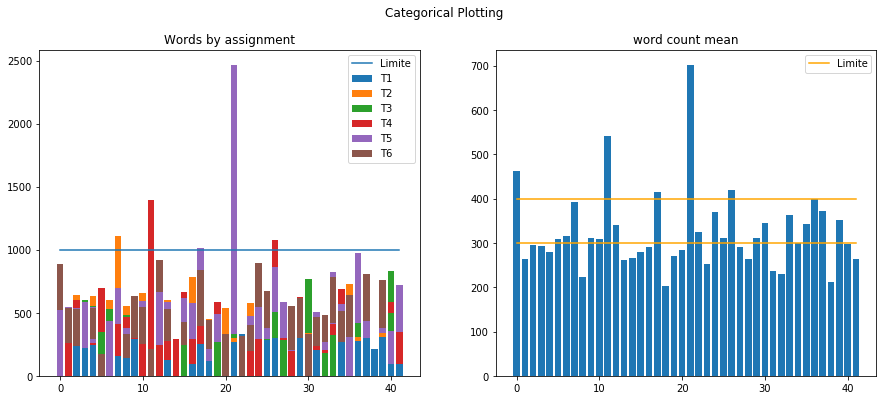

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].bar(x=data.index , height=data['wordsT1'].to_numpy(),label='T1')
axs[0].bar(x=data.index , height=data['wordsT2'].to_numpy(), bottom=data['wordsT1'].to_numpy(),label='T2')
axs[0].bar(x=data.index , height=data['wordsT3'].to_numpy(), bottom=data['wordsT2'].to_numpy(),label='T3')
axs[0].bar(x=data.index , height=data['wordsT4'].to_numpy(), bottom=data['wordsT3'].to_numpy(),label='T4')
axs[0].bar(x=data.index , height=data['wordsT5'].to_numpy(), bottom=data['wordsT4'].to_numpy(),label='T5')
axs[0].bar(x=data.index , height=data['wordsT6'].to_numpy(), bottom=data['wordsT5'].to_numpy(),label='T6')
lim = np.linspace(1000,1000, 42)
axs[0].plot(data.index,lim, label='Limite')
axs[0].legend()
axs[0].set_title("Words by assignment")

lim = np.linspace(300,300, 42)
lim2 = np.linspace(400,400, 42)
axs[1].plot(data.index,lim, label='Limite', color='orange')
axs[1].plot(data.index,lim2, color='orange')
axs[1].bar(x=data.index , height=data['words_mean'].to_numpy())
axs[1].set_title('word count mean')
axs[1].legend()

fig.suptitle('Categorical Plotting')

- La mayoria de estudiantes escriben en promedio 300 palabras.
- 9 estudiantes escribe en promedio menos de 300 palabras.
- 5 estudiantes escriben en promedio mas de 400 palabras

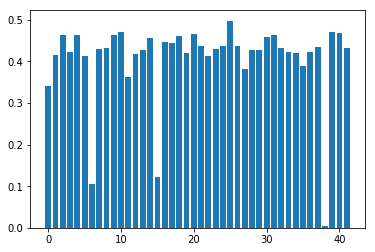

In [7]:
plt.bar(x=data.index ,height=data['perc_stopwords'].to_numpy())
plt.show()

- Dos estudiantes usan alrededor de 0.1% de stopwords.
- 4 estudiantes usan alrededor de 0.35% de stopwords.
- El resto usan más de 0.4% de stopwords.

## Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

tambien puede ser: comparación de matrices TFIDF, como genero el vector de cada estudiante?

In [16]:
#TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer().fit_transform(data.All)
tfidf

<42x5884 sparse matrix of type '<class 'numpy.float64'>'
	with 23208 stored elements in Compressed Sparse Row format>

In [17]:
# Using cosine similarity two compare each text

#from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

cosine_similarities = linear_kernel(tfidf[0:1], tfidf).flatten()
cosine_similarities

array([1.        , 0.70830962, 0.68851047, 0.68317347, 0.68736251,
       0.672003  , 0.43831825, 0.7202509 , 0.69669847, 0.71639935,
       0.67965149, 0.78581615, 0.70874345, 0.68322141, 0.59356439,
       0.45028735, 0.6801047 , 0.7323784 , 0.7101024 , 0.677885  ,
       0.68911421, 0.72952804, 0.65086206, 0.70825484, 0.65091996,
       0.68303555, 0.72352758, 0.65438715, 0.649745  , 0.71335877,
       0.6893015 , 0.67287656, 0.69891798, 0.73385457, 0.72822821,
       0.70367455, 0.69174604, 0.72938602, 0.24062382, 0.69602913,
       0.71587771, 0.71458397])

In [18]:
related_docs_indices = cosine_similarities.argsort()[:-5:-1]
related_docs_indices

array([ 0, 11, 33, 17])

- Los estudiantes 0 , 11, 17 y 33, son quienes tienen un mayor cosine similarity.

## Exercise 18.3

Create a classifier to predict the sex of each student.

Ej: las mujeres usan cierto tipo de adjetivos, o las mujeres usan signos de admiracion.
Crear manualmente dichas variables, que representen la forma de escribir de las mujeres.


In [8]:
# use CountVectorizer to create document-term matrices from X
vect = CountVectorizer(ngram_range=(1, 3))
X_dtm = vect.fit_transform(data['All'])
X_dtm

<42x79685 sparse matrix of type '<class 'numpy.int64'>'
	with 132780 stored elements in Compressed Sparse Row format>

In [9]:
features = data.drop(['Sexo','T1','T2','T3','T4','T5','T6','All'],1)
features.head(2)

,wordsT1,wordsT2,wordsT3,wordsT4,wordsT5,wordsT6,wordsTotal,words_mean,stopwords,perc_stopwords
0,354,0,602,0,518,371,1845,461.25,629,0.340921
1,226,273,0,283,262,276,1320,264.00,549,0.415909


In [10]:
y = data.Sexo
X = hstack((X_dtm,features.to_sparse().astype(float)))

X.shape

(42, 79695)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
clf= RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'],
      dtype=object)

In [13]:
data['Sexo'].value_counts()

H    34
M     8
Name: Sexo, dtype: int64

In [14]:
# Create a classifier to predict the sex of each student
cross=cross_val_score(clf, X, y, cv=3)
pd.Series(cross).describe()

count    3.000000
mean     0.810623
std      0.031589
min      0.785714
25%      0.792857
50%      0.800000
75%      0.823077
max      0.846154
dtype: float64